# Are monthly charges causing churn at Telco?

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score, precision_score, recall_score

import wrangle_project
import warnings

warnings.filterwarnings("ignore")

# Acquire Telco Data


In [2]:
# Load Telco data into a pandas DataFrame
df_telco = wrangle_project.get_telco_data()

In [3]:
# see telco data info
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
# see unpreped telco data head
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


# Prepare Telco Data (details below)
.    The prep_telco function prepares a telco DataFrame for machine learning modeling by performing the following steps:

    - Drops duplicate rows

    - Replaces blank values with NaN

    - Replaces "No internet service" with "No" for relevant columns

    - Replaces binary columns with 1 (Yes) and 0 (No)

    - Converts total_charges to a numeric data type

    - Encodes categorical columns using one-hot encoding
    
    - Drops original categorical columns

In [5]:
# pull in prepped telco data
df_telco = wrangle_project.prep_telco(df_telco)

In [6]:
# see telco data head
df_telco.head()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,tenure,tech_support,monthly_charges,total_charges,churn,gender_Male,multiple_lines_1,multiple_lines_No phone service,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0002-ORFBO,0,9,1,65.6,593.30,0,0,0,0,1,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,0,9,0,59.9,542.40,0,1,1,0,0,0,0,0,0,0,1
2,1,2,1,0004-TLHLJ,0,4,0,73.9,280.85,1,1,0,0,0,0,1,0,0,1,0
3,1,2,1,0011-IGKFF,1,13,0,98.0,1237.85,1,1,0,0,0,0,1,0,0,1,0
4,2,2,1,0013-EXCHZ,1,3,1,83.9,267.40,1,0,0,0,0,0,1,0,0,0,1


In [7]:
# distribution of train validate and test splits
train, validate, test = wrangle_project.train_validate_test_split(df_telco, target='churn')
train.shape, validate.shape, test.shape

((3943, 20), (1691, 20), (1409, 20))

# Explore Telco Data
Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis

1. Do monthly charges have an effect on churn?
Ha yes effect/ Ho no effect
2. Did customers with Fiber optic stay longer with the company? Ha customers did stay longer, Ho customers did not
3. Do customers with tech_support stay longer? Ha customers stay longer with support/Ho they do not stay longer with support
4. Do customers who pay more monthly stay around longer or not? Ha customers who pay more leave, Ho customers who pay more stay


Each question should be supported by a visualization

Each question should be answered in natural language

Two questions must be supported by a statistical test, but you may choose to support more than two

## 1. Do monthly charges have an effect on churn?

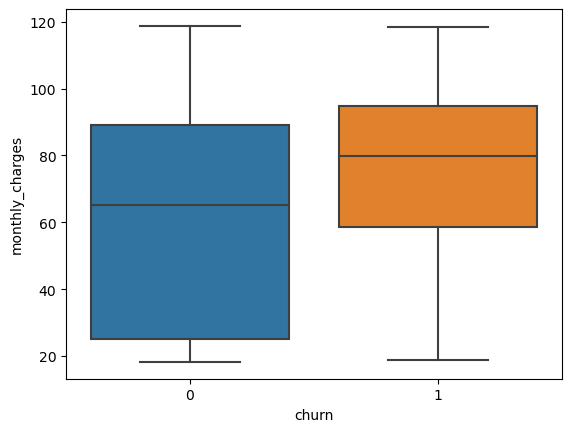

In [8]:
# visualize the distributions of churn and orange being churned and blue being no churn
sns.boxplot(x='churn', y='monthly_charges', data=train)
plt.show()

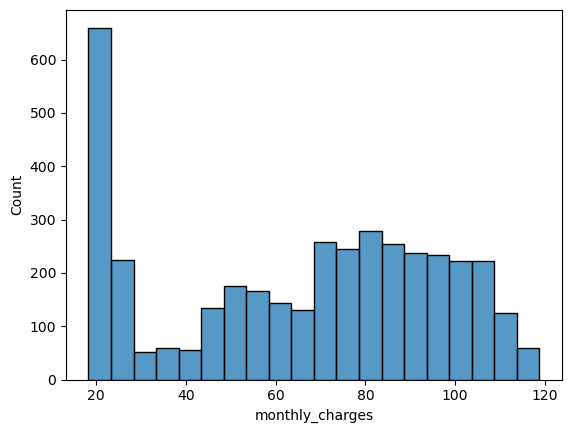

In [9]:
# Visualize the distribution of 'monthly_charges'
sns.histplot(data=train, x="monthly_charges", bins=20)
plt.show()

In [10]:

# Define the contingency table
cont_table = pd.crosstab(df_telco['churn'], pd.cut(df_telco['monthly_charges'], bins=[0, 30, 60, 100]))

# Run the chi-square test
stat, p, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-square test results:")
print("Test statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant relationship between monthly charges and churn.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant relationship between monthly charges and churn.")

Chi-square test results:
Test statistic: 356.14800634218
p-value: 4.607263511773577e-78
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant relationship between monthly charges and churn.


### It appears that there is a higher rate of churn with an increase in monthly_charges.

## 2. Did customers with Fiber optic stay longer with the company?

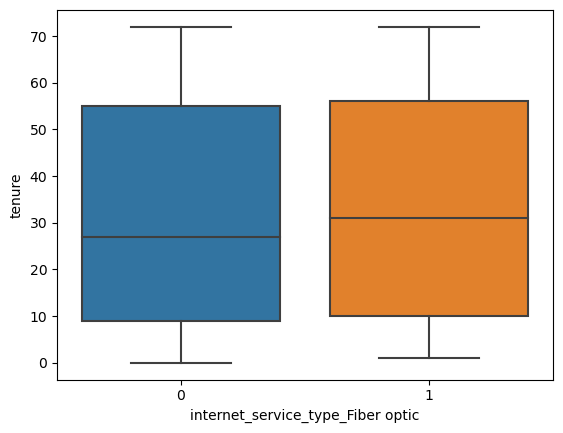

In [11]:
# boxplot of internet service type fiber optic and tenure
sns.boxplot(x='internet_service_type_Fiber optic', y='tenure', data=train)
plt.show()

### Yes customers with fiber optic stay slightly longer than customers with DSL.

## 3. Do customers with tech_support stay longer?

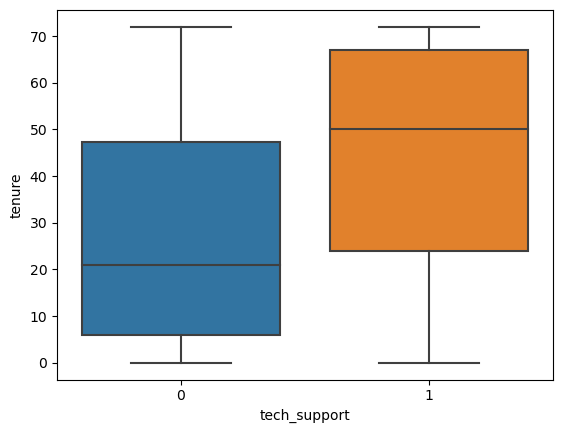

In [12]:
# boxplot of techsupport and tenure
sns.boxplot(x='tech_support', y='tenure', data=train)
plt.show()

In [13]:
# Define the two groups based on tech_support
tech_support = df_telco[df_telco['tech_support'] == 1]
no_tech_support = df_telco[df_telco['tech_support'] == 0]

# Run the t-test
stat, p = ttest_ind(tech_support['tenure'], no_tech_support['tenure'])

# Print the results
print("T-test results:")
print("Test statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the mean tenure of customers with and without tech support.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference between the mean tenure of customers with and without tech support.")

T-test results:
Test statistic: 28.759106594621016
p-value: 4.5315937120797625e-172
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the mean tenure of customers with and without tech support.


### Yes customers with tech support tend to stay longer with the company.

# 4. Do customers who pay more monthly stay around longer or not?

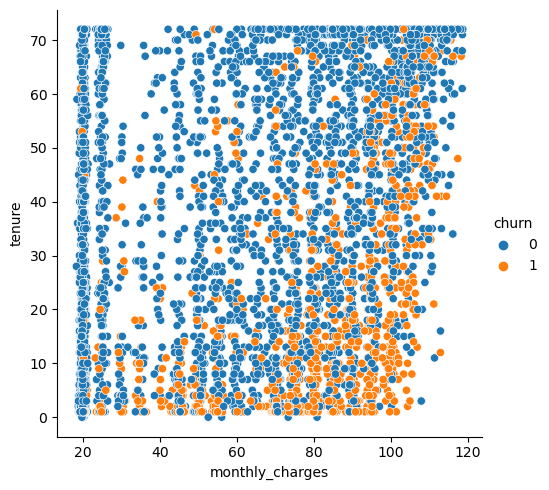

In [14]:
# relplot of monthly charges, tenure, and churn
sns.relplot(x='monthly_charges', y='tenure', hue='churn', data=train)

### It seems customers churn when they pay more and tend to stay with the company for only a short time.

## Explore summary: 
Customers who pay more churn more, but customers with tech_support stay longer.
- I used Monthly Charges, tenure, churn, and tech_support to give me some insight on the questions I was asking.
- Take away is that I found it easier to work with tenure and monthly charges so that I don't just recieve binary outputs when making plots.
- I will move forward into modeling using tenure, monthly charges, tech support, and churn. All features offer valuable information to the end goal of offering the company insight on churn information. I will not be adding any more features to the modeling process I do not believe they add much value.

# Modeling
Explain:
 Evaluating my models of churn vs monthly charges involves assessing the performance of predictive models that are designed to identify customers who are at risk of leaving our service (churn) as compared to their monthly charges. 
This evaluation process typically involves comparing the predicted churn rates and monthly charges of our customers against the actual churn rates and monthly charges that occur over a specific time period. To do this, we would need to use a range of statistical and machine learning techniques to analyze and interpret the data, including model training and validation, feature engineering, and performance metrics such as accuracy, precision, recall, and F1-score. 
Ultimately, the success of the models depends on their ability to accurately predict churn rates and monthly charges, and to help make informed decisions about how to retain Telco customers and optimize your pricing strategies.


Accuracy is the best evaluation metric for this case because it is calculated as the number of correct predictions divided by the total number of predictions. For many classification problems, accuracy is a reasonable metric to use, especially when the classes are roughly balanced. 

In [15]:
# Call the function to calculate the baseline
baseline = wrangle_project.calculate_baseline(df_telco, 'churn')

Baseline Prediction: 0
Baseline Accuracy: 0.7346


The `calculate_baseline()` function takes a preprocessed dataset and the name of the target column, and calculates the most prevalent class in the target column. It then creates an array of baseline predictions by filling the entire length of the dataset with the most prevalent class, and calculates the accuracy of the baseline model by comparing these baseline predictions with the actual values of the target column and taking the average. The function outputs the baseline prediction and accuracy, providing a point of reference to compare other models against.

In [16]:
# Define the feature and target columns
feature_cols = ['monthly_charges']
target_col = 'churn'

# Split the data into train, validation, and test sets
train_data, test_data = wrangle_project.train_test_split(df_telco, test_size=0.2, random_state=42)
train_data, val_data = wrangle_project.train_test_split(train_data, test_size=0.25, random_state=42)

# Evaluate the models on the train, validation, and test sets
wrangle_project.evaluate_models(train_data, val_data, test_data, feature_cols, target_col)

Train and Validation Metrics:
Logistic Regression:
	Train Accuracy: 0.7375
	Train Precision: 0.0000
	Train Recall: 0.0000
	Train F1-Score: 0.0000
	Validation Accuracy: 0.7253
	Validation Precision: 0.0000
	Validation Recall: 0.0000
	Validation F1-Score: 0.0000
Decision Tree:
	Train Accuracy: 0.8225
	Train Precision: 0.8037
	Train Recall: 0.4283
	Train F1-Score: 0.5588
	Validation Accuracy: 0.6757
	Validation Precision: 0.3349
	Validation Recall: 0.1835
	Validation F1-Score: 0.2371
Random Forest:
	Train Accuracy: 0.8225
	Train Precision: 0.7409
	Train Recall: 0.4977
	Train F1-Score: 0.5955
	Validation Accuracy: 0.6678
	Validation Precision: 0.3483
	Validation Recall: 0.2403
	Validation F1-Score: 0.2844
Support Vector Machine:
	Train Accuracy: 0.7375
	Train Precision: 0.0000
	Train Recall: 0.0000
	Train F1-Score: 0.0000
	Validation Accuracy: 0.7253
	Validation Precision: 0.0000
	Validation Recall: 0.0000
	Validation F1-Score: 0.0000
Best model on Test set: Logistic Regression
	Accuracy: 

# Conclusion Summary

- Yes monthly charges have a direct effect on churn rate, but there are other factors playing a part in churn.
One possible factor maybe tech support, or wether the customer has DSL over Fiber service.

My recommendation to Telco is to offer tech support with the higher monthly charges to maybe mitigate the churn rate we are seeing. I noticed during my exploring phase of the data that it appears that with tech support customers tenure is longer. I also noticed customers who have DSL typically stay longer with the company as well. 
I think it is possible to offer customers who are trying to quit the Telco service a 3 month trial of Tech Support at no additional cost, to see if they will stay with the company.

Then in the future Telco could run some ML on those customers and move forward from there. 